# For making a csv file using the given images and tsv file

In [2]:
import cv2
import os
import csv

# Path to the directory containing the images
image_dir = "train/images"

# Path to the directory containing the tsv files
tsv_dir = "train/boxes_transcripts_labels"

# Output csv file
output_file = "output.csv"

# Initialize the CSV writer
with open(output_file, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    
    # Write the header row
    writer.writerow(["filename", "start_index", "end_index", "x_top_left", "y_top_left", "x_bottom_right", "y_bottom_right", "transcript", "field"])

    # Loop over all the images in the directory
    for filename in os.listdir(image_dir):
        # Load the image
        image_path = os.path.join(image_dir, filename)
        img = cv2.imread(image_path)

        # Find the corresponding tsv file
        tsv_filename = filename.split('.')[0] + '.tsv'
        tsv_path = os.path.join(tsv_dir, tsv_filename)

        # Read the tsv file and extract the information
        with open(tsv_path, mode='r') as tsv_file:
            tsv_reader = csv.reader(tsv_file, delimiter=',')
            for row in tsv_reader:
                # Extract the information from the row
                start_index, end_index, x_top_left, y_top_left, x_bottom_right, y_bottom_right, transcript, field = row

                # Write the information to the output csv file
                writer.writerow([filename, start_index, end_index, x_top_left, y_top_left, x_bottom_right, y_bottom_right, transcript, field])


# Steps for EDA(Exploratory data analysis)
## The following steps were followed for EDA (Exploratory Data Analysis) in the code snippet you provided:

### 1. Data Loading: The CSV file containing the data was loaded into a pandas dataframe for further analysis.
### 2. Data Cleaning: The missing values in the dataset were dropped from the dataframe.
### 3. Correlation Analysis: The correlation matrix was created to identify the correlation between different variables in the dataset. A heatmap was also plotted to visualize the correlation matrix.
### 4. Data Visualization: Various plots and visualizations were used to explore the data distribution and relationship between variables in the dataset. These visualizations include:
###    - Histograms: Used to show the distribution of a single variable.
###    - Scatterplots: Used to show the relationship between two variables.
###    - Pairplot: Used to show the pairwise relationship between different variables in the dataset.
###    - Boxplot: Used to identify the distribution of the data and detect outliers. 

###   In addition to these steps, a grouped bar chart was also generated for the training data to display the distribution of the records across different fields.

In [3]:
import pandas as pd
df=pd.read_csv('output.csv')

In [4]:
df.head()

,filename,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field
0,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,33,33,215,4,227,21,a,OTHER
1,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,35,44,235,3,308,21,Employee's,OTHER
2,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,46,51,311,3,349,20,social,OTHER
3,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,53,60,352,3,401,20,security,OTHER
4,004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...,62,67,404,3,457,21,number,OTHER


In [5]:
df.shape

(237616, 9)

In [6]:
df.isnull().sum()

filename           0
start_index        0
end_index          0
x_top_left         0
y_top_left         0
x_bottom_right     0
y_bottom_right     0
transcript        58
field              0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(237558, 9)

In [9]:
df.describe()

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right
count,237558.000000,237558.000000,237558.000000,237558.000000,237558.000000,237558.000000
mean,5866.570896,5870.334251,885.841112,1183.259452,939.037317,1209.707507
std,4909.588481,4909.519821,614.092519,773.204461,616.440183,776.557540
min,0.000000,0.000000,2.000000,1.000000,20.000000,18.000000
25%,1768.000000,1771.000000,346.000000,551.000000,398.000000,575.000000
50%,4603.000000,4607.000000,816.000000,1046.000000,868.000000,1074.000000
75%,9094.000000,9098.000000,1349.000000,1773.000000,1395.000000,1805.000000
max,24646.000000,24654.000000,2395.000000,3070.000000,2458.000000,3103.000000


<Axes: >

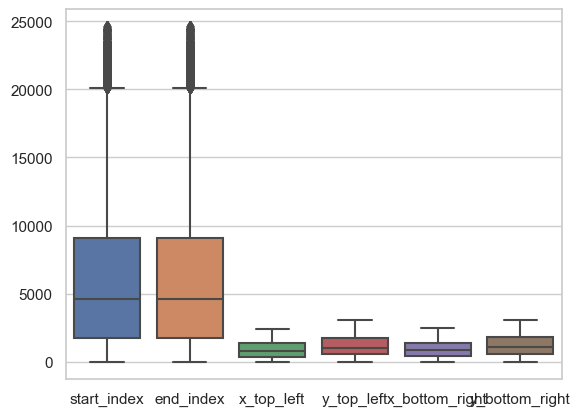

In [10]:
import seaborn as sns

sns.set(style="whitegrid")
sns.boxplot(data=df)

In [11]:
df.drop(['filename','transcript','field'], axis=1,inplace=True)

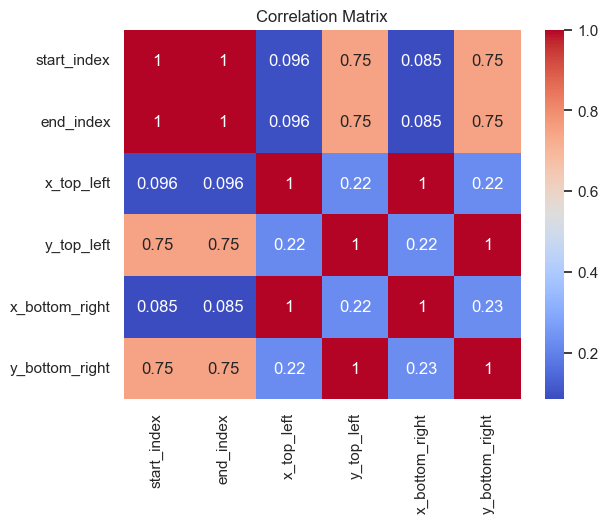

In [12]:
import matplotlib.pyplot as plt
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


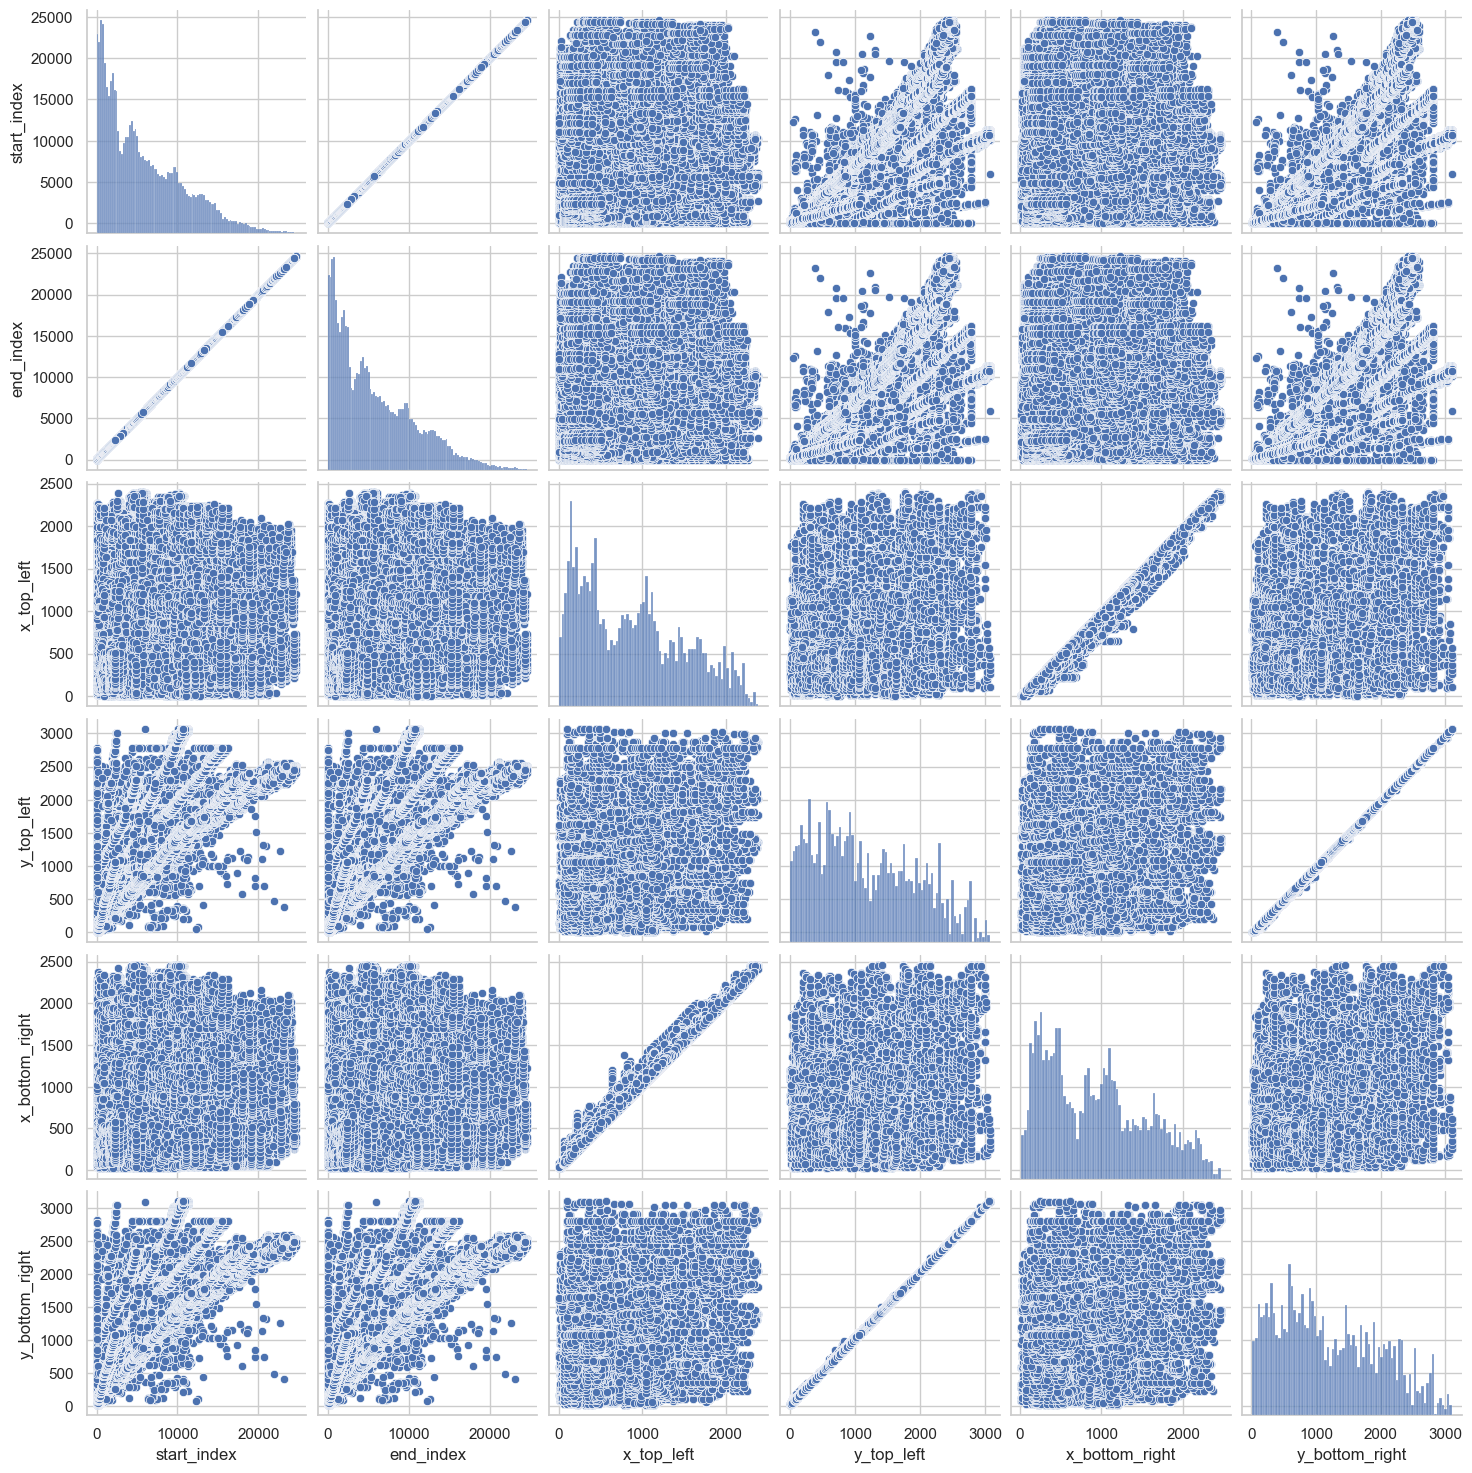

In [13]:
sns.pairplot(df)

<Axes: xlabel='start_index', ylabel='Count'>

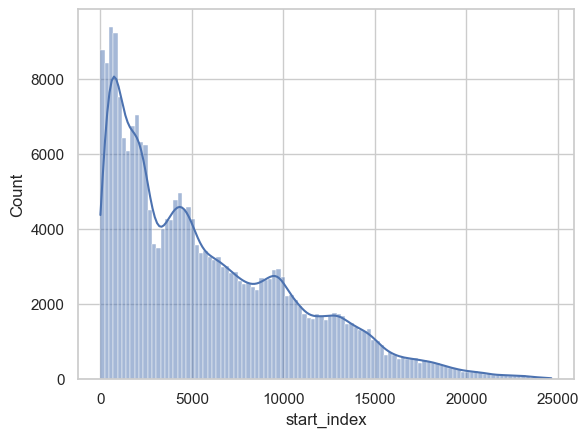

In [14]:
sns.histplot(data=df, x='start_index', kde=True)

<Axes: xlabel='start_index', ylabel='end_index'>

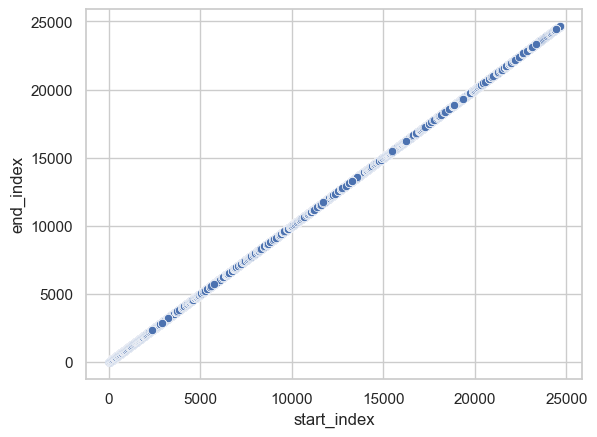

In [15]:
sns.scatterplot(data=df, x='start_index', y='end_index')

In [16]:
df1=pd.read_csv('output.csv')

In [17]:
df1.dropna(inplace=True)

In [18]:
grouped_data = df1.groupby(['field']).sum()
print(grouped_data)

                                                                             filename   
field                                                                                   
OTHER                               004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...  \
box16StateWagesTips                 004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...   
box17StateIncomeTax                 004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...   
box1WagesTipsAndOtherCompensations  004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...   
box2FederalIncomeTaxWithheld        004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...   
box3SocialSecurityWages             004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...   
box4SocialSecurityTaxWithheld       004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...   
einEmployerIdentificationNumber     004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...   
employeeName                        004a4c67-561d-4d9c-9ef2-47cb15fbdf08_document-...   
employerAddressCity  

# For Generating the test data for the evaluation 

In [20]:
import cv2
import os
import csv

# Path to the directory containing the images
image_dir = "val/images"

# Path to the directory containing the tsv files
tsv_dir = "val_w_ann/boxes_transcripts_labels"

# Output csv file
output_file = "output2.csv"

# Initialize the CSV writer
with open(output_file, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    
    # Write the header row
    writer.writerow(["filename", "start_index", "end_index", "x_top_left", "y_top_left", "x_bottom_right", "y_bottom_right", "transcript", "field"])

    # Loop over all the images in the directory
    for filename in os.listdir(image_dir):
        # Load the image
        image_path = os.path.join(image_dir, filename)
        img = cv2.imread(image_path)

        # Find the corresponding tsv file
        tsv_filename = filename.split('.')[0] + '.tsv'
        tsv_path = os.path.join(tsv_dir, tsv_filename)

        # Read the tsv file and extract the information
        with open(tsv_path, mode='r') as tsv_file:
            tsv_reader = csv.reader(tsv_file, delimiter=',')
            for row in tsv_reader:
                # Extract the information from the row
                start_index, end_index, x_top_left, y_top_left, x_bottom_right, y_bottom_right, transcript, field = row

                # Write the information to the output csv file
                writer.writerow([filename, start_index, end_index, x_top_left, y_top_left, x_bottom_right, y_bottom_right, transcript, field])


In [21]:
import cv2
import os
import csv

# Path to the directory containing the images
image_dir = "val/images"

# Path to the directory containing the tsv files
tsv_dir = "val/boxes_transcripts"

# Output csv file
output_file = "output1.csv"

# Initialize the CSV writer
with open(output_file, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    
    # Write the header row
    writer.writerow(["filename", "start_index", "end_index", "x_top_left", "y_top_left", "x_bottom_right", "y_bottom_right", "transcript"])

    # Loop over all the images in the directory
    for filename in os.listdir(image_dir):
        # Load the image
        image_path = os.path.join(image_dir, filename)
        img = cv2.imread(image_path)

        # Find the corresponding tsv file
        tsv_filename = filename.split('.')[0] + '.tsv'
        tsv_path = os.path.join(tsv_dir, tsv_filename)

        # Read the tsv file and extract the information
        with open(tsv_path, mode='r') as tsv_file:
            tsv_reader = csv.reader(tsv_file, delimiter=',')
            for row in tsv_reader:
                # Extract the information from the row
                start_index, end_index, x_top_left, y_top_left, x_bottom_right, y_bottom_right, transcript = row

                # Write the information to the output csv file
                writer.writerow([filename, start_index, end_index, x_top_left, y_top_left, x_bottom_right, y_bottom_right, transcript])


# Error Analysis
## Error analysis is performed by computing and printing the classification report and the confusion matrix for the Random Forest Classifier trained on the training data.

## The classification report provides a summary of the precision, recall, F1-score, and support for each class in the testing data.

## The confusion matrix provides a tabular representation of the predicted labels against the actual labels for each class in the testing data, allowing us to identify the number of true positives, false positives, true negatives, and false negatives.

## The accuracy score computed using metrics.accuracy_score is also a metric for error analysis, as it provides the overall accuracy of the model's predictions on the testing data.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Load the training and testing data
train_data = pd.read_csv('output.csv')
test_data = pd.read_csv('data/output2.csv')

# Split the data into features (X) and labels (y)
X_train = train_data.drop(['field','filename','transcript'], axis=1)
y_train = train_data['field']
X_test = test_data.drop(['field','filename','transcript'], axis=1)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)
# Create a new dataframe for storing the true and predicted values
results_df = pd.DataFrame(columns=['true_value', 'predicted_value'])

# Add the true and predicted values to the dataframe
results_df['true_value'] = test_data['field']
results_df['predicted_value'] = y_pred

# Print the dataframe
print(results_df)

# Print the classification report
print(classification_report(test_data['field'], y_pred))
print("Accuracy:",metrics.accuracy_score(test_data['field'], y_pred))
cm = confusion_matrix(test_data['field'], y_pred)
# Create heatmap for confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()